# Supervised Learning Regression Project: Cars4U

## Problem Statement

### Business Context

There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past years and is larger than the new car market now. Cars4U is a budding tech start-up that aims to find footholes in this market.

In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car sellers replace their old cars with pre-owned cars instead of buying new ones. Unlike new cars, where price and supply are fairly deterministic and managed by OEMs (Original Equipment Manufacturer / except for dealership level discounts which come into play only in the last stage of the customer journey), used cars are very different beasts with huge uncertainty in both pricing and supply. Keeping this in mind, the pricing scheme of these used cars becomes important in order to grow in the market.

As a senior data scientist at Cars4U, you have to come up with a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing. For example, if the business knows the market price, it will never sell anything below it. 

 
### Objective

To explore and visualize the dataset, build a linear regression model to predict the prices of used cars, and generate a set of insights and recommendations that will help the business.

 
### Data Description

The data contains the different attributes of used cars sold in different locations. The detailed data dictionary is given below. 


- S.No.: Serial number
- Name: Name of the car which includes brand name and model name
- Location: Location in which the car is being sold or is available for purchase (cities)
- Year: Manufacturing year of the car
- Kilometers_driven: The total kilometers driven in the car by the previous owner(s) in km
- Fuel_Type: The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)
- Transmission: The type of transmission used by the car (Automatic/Manual)
- Owner_Type: Type of ownership
- Mileage: The standard mileage offered by the car company in kmpl or km/kg
- Engine: The displacement volume of the engine in CC
- Power: The maximum power of the engine in bhp
- Seats: The number of seats in the car
- New_Price: The price of a new car of the same model in INR Lakhs (1 Lakh = 100,000 INR)
- Price: The price of the used car in INR Lakhs

## Importing necessary libraries

In [1]:

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to suppress warnings
import warnings

warnings.filterwarnings("ignore")

## Loading the dataset

In [2]:
# loading data
data = pd.read_csv('used_cars_data.csv')

## Data Overview

The initial steps to get an overview of any dataset is to: 
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

### Displaying the first few rows of the dataset

In [3]:
data.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,5.51,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,16.06,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,11.27,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,53.14,17.74


### Checking the shape of the dataset

In [4]:
data.shape 

(7253, 14)

### Checking the data types of the columns for the dataset

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7078 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          7253 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(3), int64(3), object(8)
memory usage: 793.4+ KB


### Statistical summary of the dataset

In [6]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
S.No.,7253.0,NaN,NaN,NaN,3626.0,2093.905084,0.0,1813.0,3626.0,5439.0,7252.0
Name,7253,2041,Mahindra XUV500 W8 2WD,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,7253,11,Mumbai,949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,7253.0,NaN,NaN,NaN,2013.365366,3.254421,1996.0,2011.0,2014.0,2016.0,2019.0
Kilometers_Driven,7253.0,NaN,NaN,NaN,58699.063146,84427.720583,171.0,34000.0,53416.0,73000.0,6500000.0
Fuel_Type,7253,5,Diesel,3852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7253,2,Manual,5204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7253,4,First,5952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,7251,450,17.0 kmpl,207,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine,7207,150,1197 CC,732,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* Kilometers_Driven : Highly right skewed distribution with the mean 58699
* Location : Mumbai is the location which use the used cars among all other cities
* Fuel_Type : ‘Diesel’ car is most preferred one by the customers
* Transmission : People prefer Manual cars over Automatic cars
* Owner : Users prefer to buy the used cars from the owner for the first time
* Price : Price also has a huge spread ranging from 0.44 Lakhs to 160 Lakhs , mean is greater than median which indicates right skew


### Checking for duplicate values

### Checking for missing values

In [7]:
data.duplicated().sum() 

0

- No duplicate entries in the dataset

In [8]:
data.isnull().sum().sort_values(ascending=False) 

Price                1234
Power                 175
Seats                  53
Engine                 46
Mileage                 2
S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
New_Price               0
dtype: int64

In [9]:
# creating a copy of the data to avoid changes to the original data
df = data.copy()

## Data Preprocessing

### Feature Engineering

**1. `Mileage`**

* We have car mileage in two units as per the data dictionary - kmpl and km/kg.

* After quick research on the internet, it is clear that these 2 units are used for cars of 2 different fuel types.

    * kmpl (kilometers per liter) is used for petrol and diesel cars.
    * km/kg (kilometers per kg) is used for CNG and LPG-based engines.

* We have the variable `Fuel_type` in our data. We will check if these observations hold true in our data too.

In [10]:
df["Mileage"].value_counts().sort_values(ascending=False).head(10) 

17.0 kmpl     207
18.9 kmpl     201
18.6 kmpl     144
21.1 kmpl     106
20.36 kmpl    105
17.8 kmpl      98
18.0 kmpl      89
12.8 kmpl      87
18.5 kmpl      86
16.0 kmpl      85
Name: Mileage, dtype: int64

In [11]:
df_Mileage = df["Mileage"].str.split(" ", expand = True)
df_Mileage.head(4)

,0,1
0,26.6,km/kg
1,19.67,kmpl
2,18.2,kmpl
3,20.77,kmpl


In [12]:
df_Mileage[1].value_counts() # checking if there are different units

kmpl     7177
km/kg      74
Name: 1, dtype: int64

In [13]:
df["Mileage_num"]=df_Mileage[0].astype(float)
df["Mileage_unit"]=df_Mileage[1]

# Checking the new dataframe
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Mileage_num,Mileage_unit
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,5.51,1.75,26.60,km/kg
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,16.06,12.50,19.67,kmpl
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61,4.50,18.20,kmpl
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,11.27,6.00,20.77,kmpl
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,53.14,17.74,15.20,kmpl


In [14]:
# Let's check if the units correspond to the fuel types
df.groupby(by=["Fuel_Type", "Mileage_unit"]).size()

Fuel_Type  Mileage_unit
CNG        km/kg             62
Diesel     kmpl            3852
LPG        km/kg             12
Petrol     kmpl            3325
dtype: int64

**2. `Engine`**

* As per the data dictionary, the `Engine` column indicates the displacement volume of the engine in CC.
* Let's extract the numerical part of the column values.

In [15]:
df["Engine"].value_counts().head(10) 

1197 CC    732
1248 CC    610
1498 CC    370
998 CC     309
1198 CC    281
2179 CC    278
1497 CC    273
1968 CC    266
1995 CC    212
1461 CC    188
Name: Engine, dtype: int64

In [16]:
df_engine = df["Engine"].str.split(" ", expand=True)
df_engine.head()

,0,1
0,998,CC
1,1582,CC
2,1199,CC
3,1248,CC
4,1968,CC


In [17]:
df_engine[1].value_counts() 

CC    7207
Name: 1, dtype: int64

In [18]:
df["engine_num"] = df_engine[0].astype(float) 

# Checking the new dataframe
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Mileage_num,Mileage_unit,engine_num
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,5.51,1.75,26.60,km/kg,998.0
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,16.06,12.50,19.67,kmpl,1582.0
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61,4.50,18.20,kmpl,1199.0
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,11.27,6.00,20.77,kmpl,1248.0
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,53.14,17.74,15.20,kmpl,1968.0


**3. `Power`**

* As per the data dictionary, the `Power` column indicates the maximum power of the engine in bhp.
* Let's extract the numerical part of the column values.

In [19]:
df["Power"].value_counts().head(10)  

74 bhp       280
98.6 bhp     166
73.9 bhp     152
140 bhp      142
78.9 bhp     128
67.1 bhp     126
67.04 bhp    125
82 bhp       124
88.5 bhp     120
118 bhp      111
Name: Power, dtype: int64

In [20]:
df_power = df["Power"].str.split(" ", expand=True)
df_power.head()

,0,1
0,58.16,bhp
1,126.2,bhp
2,88.7,bhp
3,88.76,bhp
4,140.8,bhp


In [21]:
df_power[1].value_counts() 

bhp    7078
Name: 1, dtype: int64

In [22]:
df["power_num"] = df_power[0].astype(float) 

# Checking the new dataframe
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Mileage_num,Mileage_unit,engine_num,power_num
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,5.51,1.75,26.60,km/kg,998.0,58.16
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,16.06,12.50,19.67,kmpl,1582.0,126.20
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61,4.50,18.20,kmpl,1199.0,88.70
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,11.27,6.00,20.77,kmpl,1248.0,88.76
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,53.14,17.74,15.20,kmpl,1968.0,140.80


- We have extracted numerical values from the `Mileage`, `Engine`, and `Power` columns.

- The `Name` column in the current format might not be very useful in our analysis.
- Since the name contains both the brand name and the model name of the vehicle, the column would have too many unique values to be useful in prediction.

In [23]:
# checking number of unique values
df["Name"].nunique()

2041

 - With 2041 unique names, car names are not going to be great predictors of the price in our current data.

 - But we can process this column to extract important information and see if that reduces the number of levels for this information

**4. Extracting `Brand` from `Name`**

In [24]:
# extracting brand names
df["Brand"] = df["Name"].apply(lambda x: x.split(" ")[0].lower())
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Mileage_num,Mileage_unit,engine_num,power_num,Brand
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,5.51,1.75,26.60,km/kg,998.0,58.16,maruti
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,16.06,12.50,19.67,kmpl,1582.0,126.20,hyundai
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61,4.50,18.20,kmpl,1199.0,88.70,honda
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,11.27,6.00,20.77,kmpl,1248.0,88.76,maruti
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,53.14,17.74,15.20,kmpl,1968.0,140.80,audi


In [25]:
# checking the unique values and their number of occurences
df["Brand"].value_counts()

maruti           1444
hyundai          1340
honda             743
toyota            507
mercedes-benz     380
volkswagen        374
ford              351
mahindra          331
bmw               312
audi              285
tata              228
skoda             202
renault           170
chevrolet         151
nissan            117
land               67
jaguar             48
fiat               38
mitsubishi         36
mini               31
volvo              28
porsche            19
jeep               19
datsun             17
isuzu               5
force               3
bentley             2
smart               1
ambassador          1
lamborghini         1
hindustan           1
opelcorsa           1
Name: Brand, dtype: int64

- There are 32 brands of cars in the data

**5. Extracting `Model` from `Name`**

In [26]:
df["Model"] = df['Name'].apply(lambda x: x.split(" ")[1].lower())
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Mileage_num,Mileage_unit,engine_num,power_num,Brand,Model
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,5.51,1.75,26.60,km/kg,998.0,58.16,maruti,wagon
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,16.06,12.50,19.67,kmpl,1582.0,126.20,hyundai,creta
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61,4.50,18.20,kmpl,1199.0,88.70,honda,jazz
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,11.27,6.00,20.77,kmpl,1248.0,88.76,maruti,ertiga
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,53.14,17.74,15.20,kmpl,1968.0,140.80,audi,a4


In [27]:
df["Model"].value_counts() 

swift      418
city       318
i20        303
innova     203
verna      200
          ... 
fortwo       1
redi         1
e            1
mustang      1
1.4gsi       1
Name: Model, Length: 218, dtype: int64

- There are 218 different car models in the data.

### Dealing with anomalous values

**Before we start exploring the data further, let's quickly check the missingness in the data.**

In [28]:
df.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_Price               0
Price                1234
Mileage_num             2
Mileage_unit            2
engine_num             46
power_num             175
Brand                   0
Model                   0
dtype: int64

- 2 cars dont have entries for Mileage.

- Engine displacement information of 46 observations is missing, the maximum power of 175 entries is missing, and information about the number of seats is not available for 53 entries.

- Price is also missing for 1234 entries. Since Price is the target variable that we want to predict, we will have to drop these rows when we actually build a model.

- These rows will not be able to help us in modeling or model evaluation. But while we are analyzing the distributions and doing missing value imputations, we will keep using information from these rows.

In [29]:
# dropping the redundant columns.
df.drop(columns=["Mileage_unit", "S.No.","Mileage","Engine","Power"], inplace=True)

In [30]:
df.sort_values(by=["Kilometers_Driven"], ascending=False).head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,Mileage_num,engine_num,power_num,Brand,Model
2328,BMW X5 xDrive 30d M Sport,Chennai,2017,6500000,Diesel,Automatic,First,5.0,55.07,65.00,15.97,2993.0,258.00,bmw,x5
340,Skoda Octavia Ambition Plus 2.0 TDI AT,Kolkata,2013,775000,Diesel,Automatic,First,5.0,25.83,7.50,19.30,1968.0,141.00,skoda,octavia
1860,Volkswagen Vento Diesel Highline,Chennai,2013,720000,Diesel,Manual,First,5.0,13.23,5.90,20.54,1598.0,103.60,volkswagen,vento
358,Hyundai i10 Magna 1.2,Chennai,2009,620000,Petrol,Manual,First,5.0,10.25,2.70,20.36,1197.0,78.90,hyundai,i10
2823,Volkswagen Jetta 2013-2015 2.0L TDI Highline AT,Chennai,2015,480000,Diesel,Automatic,First,5.0,10.15,13.00,16.96,1968.0,138.03,volkswagen,jetta
3092,Honda City i VTEC SV,Kolkata,2015,480000,Petrol,Manual,First,5.0,13.58,5.00,17.40,1497.0,117.30,honda,city
4491,Hyundai i20 Magna Optional 1.2,Bangalore,2013,445000,Petrol,Manual,First,5.0,10.25,4.45,18.50,1197.0,82.90,hyundai,i20
6921,Maruti Swift Dzire Tour LDI,Jaipur,2012,350000,Diesel,Manual,First,5.0,7.88,NaN,23.40,1248.0,74.00,maruti,swift
3649,Tata Indigo LS,Jaipur,2008,300000,Diesel,Manual,First,5.0,7.63,1.00,17.00,1405.0,70.00,tata,indigo
1528,Toyota Innova 2.5 G (Diesel) 8 Seater BS IV,Hyderabad,2005,299322,Diesel,Manual,First,8.0,24.01,4.00,12.80,2494.0,102.00,toyota,innova


**Observations**

There is one extreme higher end value for 'Kilometers_Driven' which is '6500000'.
Next to that few cars are above 300000kms driven

In [31]:
df.loc[ 2328 , "Kilometers_Driven"] = np.nan   

In [32]:
df.sort_values(by=["Kilometers_Driven"], ascending=True).head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,Mileage_num,engine_num,power_num,Brand,Model
1361,Maruti Alto 800 2016-2019 VXI,Mumbai,2019,171.0,Petrol,Manual,First,5.0,4.36,3.60,24.70,796.0,47.30,maruti,alto
5606,Maruti Wagon R ZXI AMT 1.2,Mumbai,2019,600.0,Petrol,Automatic,First,5.0,6.80,6.25,21.50,1197.0,81.80,maruti,wagon
5339,Hyundai i20 Active SX Dual Tone Petrol,Pune,2019,1000.0,Petrol,Manual,First,5.0,10.25,8.60,17.19,1197.0,81.86,hyundai,i20
6201,Maruti Alto LXI,Kolkata,2019,1000.0,Petrol,Manual,First,5.0,3.99,NaN,24.70,796.0,47.30,maruti,alto
1198,Volkswagen Polo 1.0 MPI Trendline,Hyderabad,2019,1000.0,Petrol,Manual,First,5.0,6.74,5.68,18.78,999.0,75.00,volkswagen,polo
1242,Jaguar XE 2.0L Diesel Prestige,Delhi,2018,1000.0,Diesel,Automatic,First,5.0,52.77,40.00,13.60,1999.0,177.00,jaguar,xe
2646,Ford Figo 2015-2019 1.2P Sports Edition MT,Mumbai,2019,1000.0,Petrol,Manual,First,5.0,7.65,6.80,18.12,1196.0,86.80,ford,figo
5941,Renault KWID RXL,Pune,2018,1000.0,Petrol,Manual,First,5.0,4.45,3.40,25.17,799.0,53.30,renault,kwid
6760,Fiat Avventura Urban Cross 1.3 Multijet Emotion,Kolkata,2019,1000.0,Diesel,Manual,First,5.0,9.26,NaN,20.50,1248.0,91.72,fiat,avventura
173,Hyundai Grand i10 1.2 Kappa Asta,Kolkata,2019,1000.0,Petrol,Manual,First,5.0,7.39,6.50,18.90,1197.0,81.86,hyundai,grand


**Observations**

- Two cars with the lower end which are 171 and 600 kms driven.
MOst of the other cars are ran 1000 kms and above

In [33]:
df.sort_values(by=["Seats"], ascending=True).head(5) 

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,Mileage_num,engine_num,power_num,Brand,Model
3999,Audi A4 3.2 FSI Tiptronic Quattro,Hyderabad,2012,125000.0,Petrol,Automatic,First,0.0,53.14,18.00,10.5,3197.0,NaN,audi,a4
693,Mercedes-Benz SLK-Class SLK 350,Coimbatore,2016,22732.0,Petrol,Automatic,First,2.0,49.49,55.54,18.1,3498.0,306.0,mercedes-benz,slk-class
798,Mercedes-Benz SLK-Class SLK 350,Bangalore,2015,10000.0,Petrol,Automatic,First,2.0,49.49,55.00,18.1,3498.0,306.0,mercedes-benz,slk-class
5781,Lamborghini Gallardo Coupe,Delhi,2011,6500.0,Petrol,Automatic,Third,2.0,11.30,120.00,6.4,5204.0,560.0,lamborghini,gallardo
4722,Mercedes-Benz SL-Class SL 500,Kolkata,2010,35000.0,Petrol,Automatic,First,2.0,49.49,29.50,8.1,5461.0,387.3,mercedes-benz,sl-class


**Observations**

-As per our data, one car doesnot have seat at all.
Remaining cars have 2 and above seats 

In [34]:
df[df["Name"].str.startswith("Audi A4")]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,Mileage_num,engine_num,power_num,Brand,Model
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670.0,Diesel,Automatic,Second,5.0,53.14,17.74,15.20,1968.0,140.80,audi,a4
50,Audi A4 2.0 TDI 177 Bhp Premium Plus,Kochi,2015,13648.0,Diesel,Automatic,First,5.0,53.14,21.43,17.11,1968.0,174.33,audi,a4
65,Audi A4 2.0 TDI Multitronic,Jaipur,2012,65664.0,Diesel,Automatic,First,5.0,53.14,13.50,16.55,1968.0,140.00,audi,a4
103,Audi A4 3.0 TDI Quattro Premium,Kolkata,2010,30000.0,Diesel,Automatic,First,5.0,53.14,9.80,14.94,2967.0,241.40,audi,a4
150,Audi A4 2.0 TDI 177 Bhp Premium Plus,Coimbatore,2015,48214.0,Diesel,Automatic,First,5.0,53.14,23.32,17.11,1968.0,174.33,audi,a4
717,Audi A4 2.0 TDI 177 Bhp Premium Plus,Bangalore,2013,45979.0,Diesel,Automatic,Second,5.0,53.14,19.50,17.11,1968.0,174.33,audi,a4
853,Audi A4 2.0 TDI,Delhi,2011,46000.0,Diesel,Automatic,Second,5.0,53.14,10.99,16.55,1968.0,147.51,audi,a4
854,Audi A4 2.0 TDI,Kolkata,2012,47346.0,Diesel,Automatic,First,5.0,53.14,14.50,16.55,1968.0,147.51,audi,a4
874,Audi A4 2.0 TDI Multitronic,Ahmedabad,2011,59000.0,Diesel,Automatic,First,5.0,53.14,12.50,16.55,1968.0,140.00,audi,a4
964,Audi A4 2.0 TDI,Kolkata,2009,34000.0,Diesel,Automatic,First,5.0,53.14,9.95,16.55,1968.0,147.51,audi,a4


* Looks like an Audi A4 typically has 5 seats.

In [35]:
df.sort_values(by=["Seats"], ascending=False).head(5) 

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,Mileage_num,engine_num,power_num,Brand,Model
6875,Toyota Qualis FS B3,Pune,2002,119613.0,Diesel,Manual,Second,10.0,24.01,NaN,13.10,2446.0,75.0,toyota,qualis
917,Tata Sumo DX,Mumbai,2013,20000.0,Diesel,Manual,First,10.0,7.63,5.25,14.07,1978.0,83.1,tata,sumo
2575,Chevrolet Tavera LS B3 10 Seats BSIII,Hyderabad,2015,120000.0,Diesel,Manual,First,10.0,11.30,5.50,14.80,2499.0,80.0,chevrolet,tavera
6242,Tata Sumo EX 10/7 Str BSII,Chennai,2015,196000.0,Diesel,Manual,Second,10.0,7.63,NaN,12.20,1948.0,68.0,tata,sumo
1907,Toyota Qualis FS B3,Bangalore,2002,63000.0,Diesel,Manual,Third,10.0,24.01,3.65,13.10,2446.0,75.0,toyota,qualis


In [36]:
df.sort_values(by=["Mileage_num"], ascending=True).head(20)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,Mileage_num,engine_num,power_num,Brand,Model
2597,Hyundai Santro Xing XP,Pune,2007,70000.0,Petrol,Manual,First,5.0,4.550,1.12,0.0,1086.0,NaN,hyundai,santro
2343,Hyundai Santro AT,Hyderabad,2006,74483.0,Petrol,Automatic,First,5.0,4.550,2.30,0.0,999.0,NaN,hyundai,santro
5270,Honda City 1.5 GXI,Bangalore,2002,53000.0,Petrol,Manual,Second,NaN,13.580,1.85,0.0,NaN,NaN,honda,city
424,Volkswagen Jetta 2007-2011 1.9 L TDI,Hyderabad,2010,42021.0,Diesel,Manual,First,5.0,10.150,5.45,0.0,1968.0,NaN,volkswagen,jetta
6857,Land Rover Freelander 2 TD4 SE,Mumbai,2011,87000.0,Diesel,Automatic,First,5.0,120.000,NaN,0.0,2179.0,115.00,land,rover
443,Hyundai Santro GLS I - Euro I,Coimbatore,2012,50243.0,Petrol,Manual,First,5.0,4.550,3.35,0.0,1086.0,NaN,hyundai,santro
5119,Hyundai Santro Xing XP,Kolkata,2008,45500.0,Petrol,Manual,Second,5.0,4.550,1.17,0.0,1086.0,NaN,hyundai,santro
5022,Land Rover Freelander 2 TD4 SE,Hyderabad,2013,46000.0,Diesel,Automatic,Second,5.0,120.000,26.00,0.0,2179.0,115.00,land,rover
5016,Land Rover Freelander 2 TD4 HSE,Delhi,2013,72000.0,Diesel,Automatic,First,5.0,120.000,15.50,0.0,2179.0,115.00,land,rover
2542,Hyundai Santro GLS II - Euro II,Bangalore,2011,65000.0,Petrol,Manual,Second,NaN,4.550,3.15,0.0,NaN,NaN,hyundai,santro


**Observations**

- There are many cars with the mileage 0

In [37]:
df.loc[df.Mileage_num == 'NaN' , "Mileage_num"] = np.nan 

In [38]:
df.Mileage_num.isnull().sum()

2

In [39]:
df.sort_values(by=["Mileage_num"], ascending=False).head(10) 

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,Mileage_num,engine_num,power_num,Brand,Model
1332,Maruti Wagon R CNG LXI,Pune,2013,79494.0,CNG,Manual,First,5.0,5.54,2.96,33.54,998.0,67.04,maruti,wagon
2059,Maruti Wagon R CNG LXI,Mumbai,2013,54000.0,CNG,Manual,First,5.0,5.58,3.05,33.54,998.0,67.04,maruti,wagon
2371,Maruti Wagon R CNG LXI,Pune,2014,29202.0,CNG,Manual,First,5.0,5.54,3.90,33.54,998.0,67.04,maruti,wagon
3129,Maruti Wagon R CNG LXI,Delhi,2014,74663.0,CNG,Manual,First,5.0,5.35,3.25,33.54,998.0,67.04,maruti,wagon
4141,Maruti Wagon R CNG LXI,Mumbai,2014,47200.0,CNG,Manual,First,5.0,5.58,2.85,33.54,998.0,67.04,maruti,wagon
3869,Maruti Alto 800 2016-2019 CNG LXI,Delhi,2012,65537.0,CNG,Manual,Second,4.0,4.36,2.10,33.44,796.0,40.30,maruti,alto
1269,Maruti Alto 800 2016-2019 CNG LXI,Mumbai,2018,10600.0,CNG,Manual,First,4.0,4.36,3.50,33.44,796.0,40.30,maruti,alto
3553,Maruti Alto 800 2016-2019 CNG LXI,Pune,2015,18000.0,CNG,Manual,First,4.0,4.36,3.00,33.44,796.0,40.30,maruti,alto
4769,Maruti Alto 800 2016-2019 CNG LXI,Kochi,2017,24310.0,CNG,Manual,First,4.0,4.36,3.70,33.44,796.0,40.30,maruti,alto
6019,Maruti Alto K10 LXI CNG,Delhi,2014,40929.0,CNG,Manual,First,4.0,4.36,NaN,32.26,998.0,58.20,maruti,alto


**Observartions**

- Maruti gives high mileage which is above 30

In [40]:
# looking at value counts for non-numeric features

num_to_display = 10  

for colname in df.dtypes[df.dtypes == "object"].index:
    val_counts = df[colname].value_counts(dropna=False)  
    print(val_counts[:num_to_display])

    if len(val_counts) > num_to_display:
        print(f"Only displaying first {num_to_display} of {len(val_counts)} values.")
    print("-" * 50, "\n")  

Mahindra XUV500 W8 2WD        55
Maruti Swift VDI              49
Maruti Swift Dzire VDI        42
Honda City 1.5 S MT           39
Maruti Swift VDI BSIV         37
Maruti Ritz VDi               35
Toyota Fortuner 3.0 Diesel    35
Honda Amaze S i-Dtech         32
Hyundai Grand i10 Sportz      32
Honda City 1.5 V MT           32
Name: Name, dtype: int64
Only displaying first 10 of 2041 values.
-------------------------------------------------- 

Mumbai        949
Hyderabad     876
Coimbatore    772
Kochi         772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Name: Location, dtype: int64
Only displaying first 10 of 11 values.
-------------------------------------------------- 

Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric       2
Name: Fuel_Type, dtype: int64
-------------------------------------------------- 

Manual       5204
Automatic    2049
Name: Transmission, dtype: int64
-------------

**Observations**

- Write the Observations

In [41]:
df.groupby(["Brand"])["Price"].mean().sort_values(ascending=False)  

Brand
lamborghini      120.000000
bentley           59.000000
porsche           48.348333
land              39.259500
jaguar            37.632250
mini              26.896923
mercedes-benz     26.809874
audi              25.537712
bmw               25.243146
volvo             18.802857
jeep              18.718667
isuzu             14.696667
toyota            11.580024
mitsubishi        11.058889
force              9.333333
mahindra           8.045919
skoda              7.559075
ford               6.889400
renault            5.799034
honda              5.411743
hyundai            5.343433
volkswagen         5.307270
nissan             4.738352
maruti             4.517267
tata               3.562849
fiat               3.269286
datsun             3.049231
chevrolet          3.044463
smart              3.000000
ambassador         1.350000
hindustan               NaN
opelcorsa               NaN
Name: Price, dtype: float64

**Observations**

-  Most expensive car in this dataset is Lamborghini and the average price is 120 Lakhs.
- Next place taken by Blently which costs 59 Lakhs.
- The cheapest amoung all is ambassador which cost around 1.35 lakhs

**Creating the new columns that are log transformed**

In [42]:
df["price_log"] = np.log(df["Price"]) 

In [43]:
df["new_price_log"] = np.log(df["New_Price"])  

In [44]:
df["kilometers_driven_log"] = np.log(df["Kilometers_Driven"]) 

In [45]:
df.drop(columns=["Name"], inplace=True) 

In [46]:
## Creating a copy of data to perform EDA in the apendix section
df1 = df.copy()
df2=df.copy()
df3=df.copy()

## Exploratory Data Analysis

#### The below functions need to be defined to carry out the Exploratory Data Analysis.

In [47]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [57]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Univariate Analysis

#### `Price`

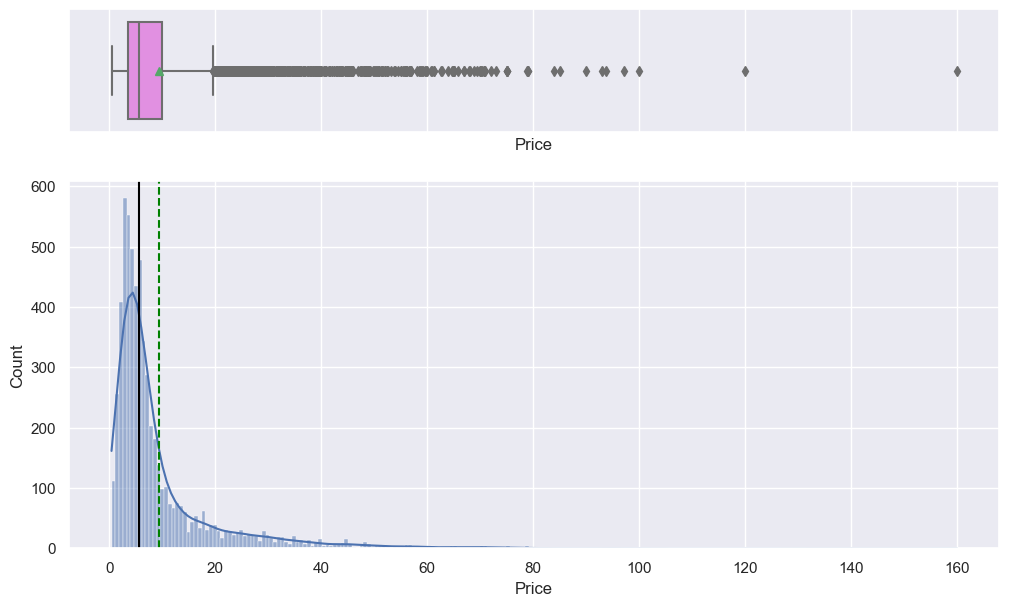

In [48]:
histogram_boxplot(df1, "Price", kde=True)

 - The distribution of Age is highly right skewed. It has few extreme outliners too.

#### `price_log`

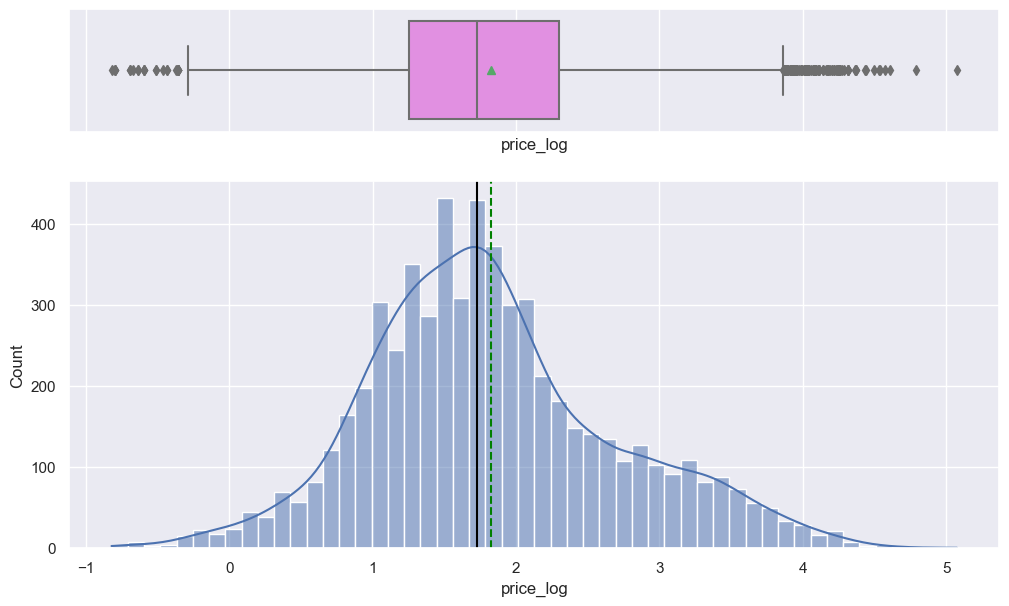

In [49]:
histogram_boxplot(df1, "price_log", kde=True)

- Using the log transformation has definitely helped in reducing the skew.


#### `New_Price`

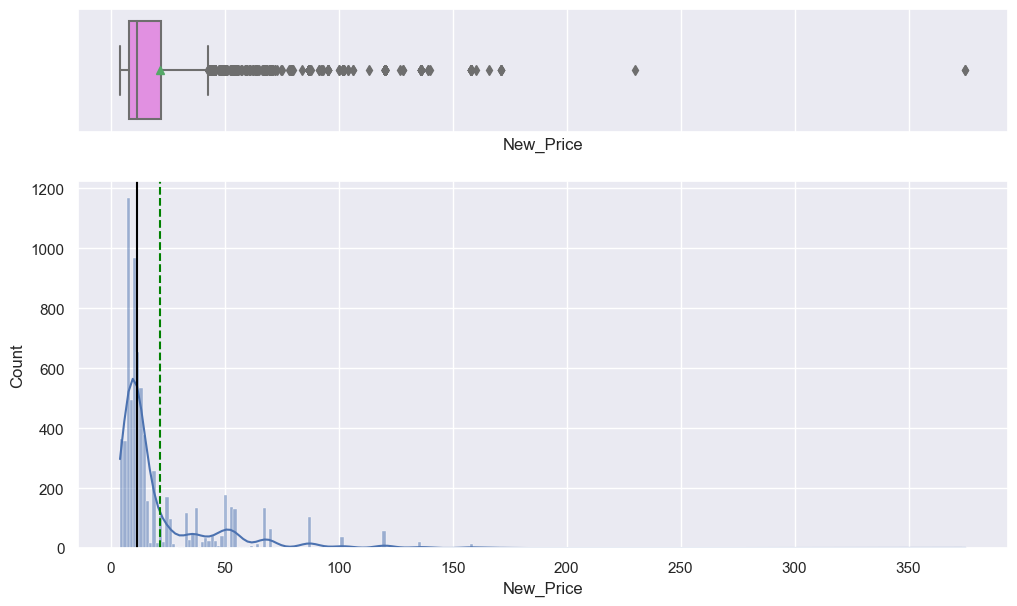

In [50]:
histogram_boxplot(df1, "New_Price", kde=True)

- This is another highly skewed distribution.
- Let us use log transformation on this column too.

#### `new_price_log`

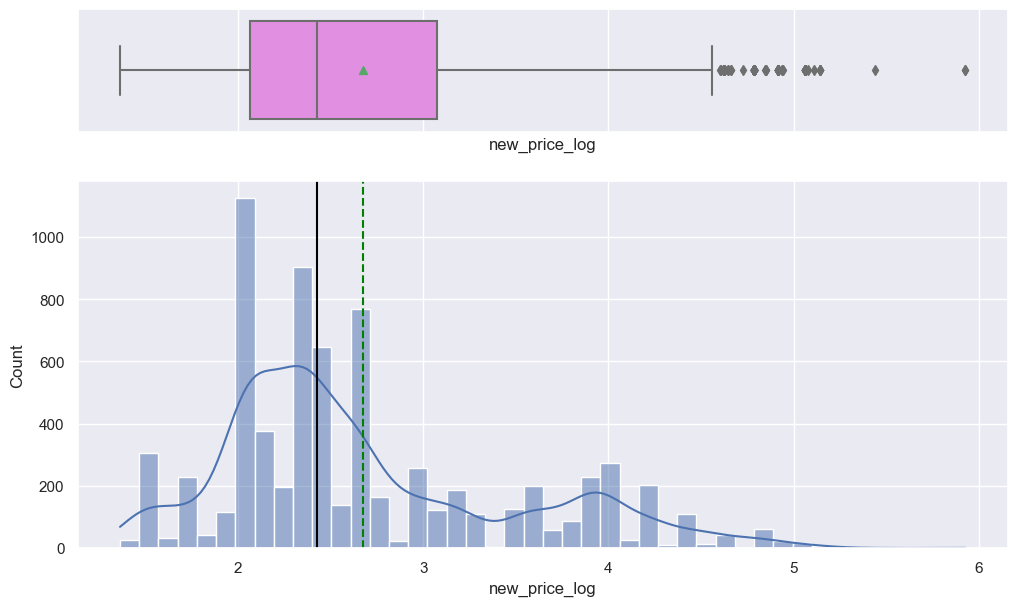

In [51]:
histogram_boxplot(df1, "new_price_log", kde=True)

- Transformation has reduced the extreme skewness.

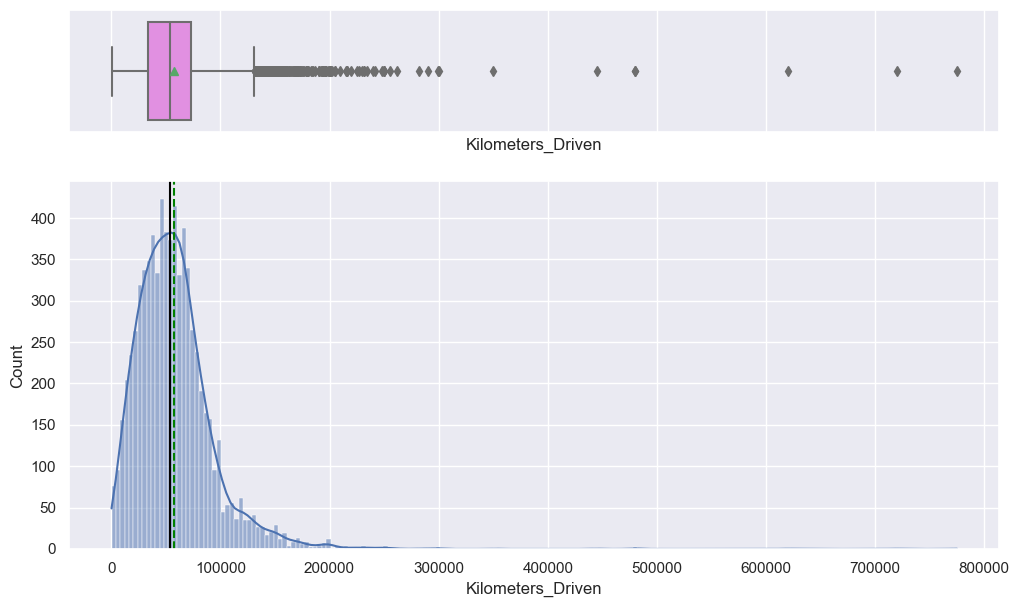

In [117]:
histogram_boxplot(df1, "Kilometers_Driven", kde=True)

-  Is it a highly right skewed distribution with many outliners
- Lets see the log transformed plot

#### `kilometers_driven_log`

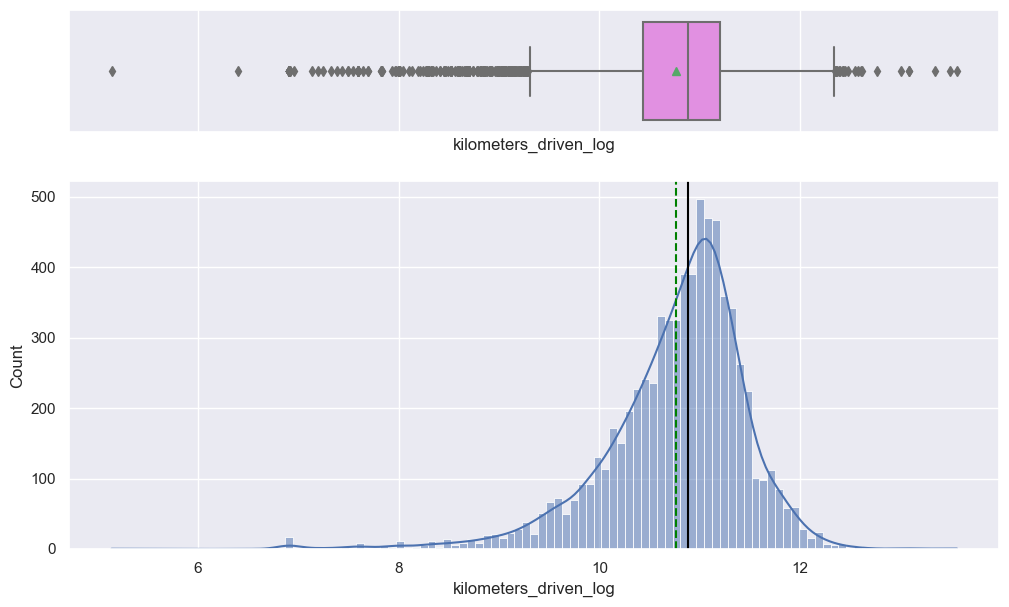

In [52]:
histogram_boxplot(df1, "kilometers_driven_log", kde=True)

- Transformation has reduced the extreme skewness.

#### `mileage_num`

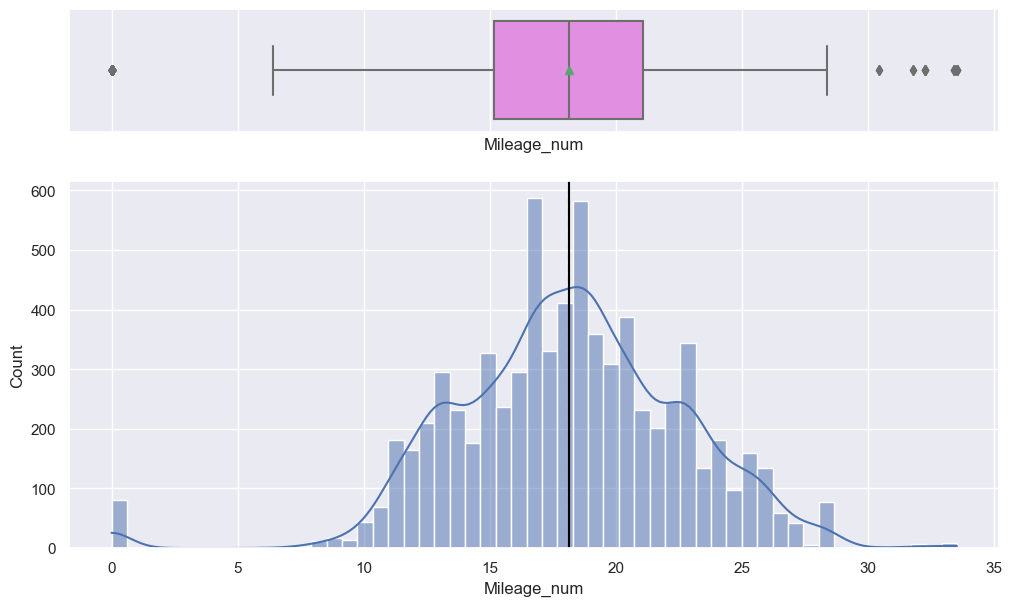

In [53]:
histogram_boxplot(df1, "Mileage_num", kde=True)

- Mileage is almost normally distributed with the outliers at the both lower and upper end


#### `engine_num`

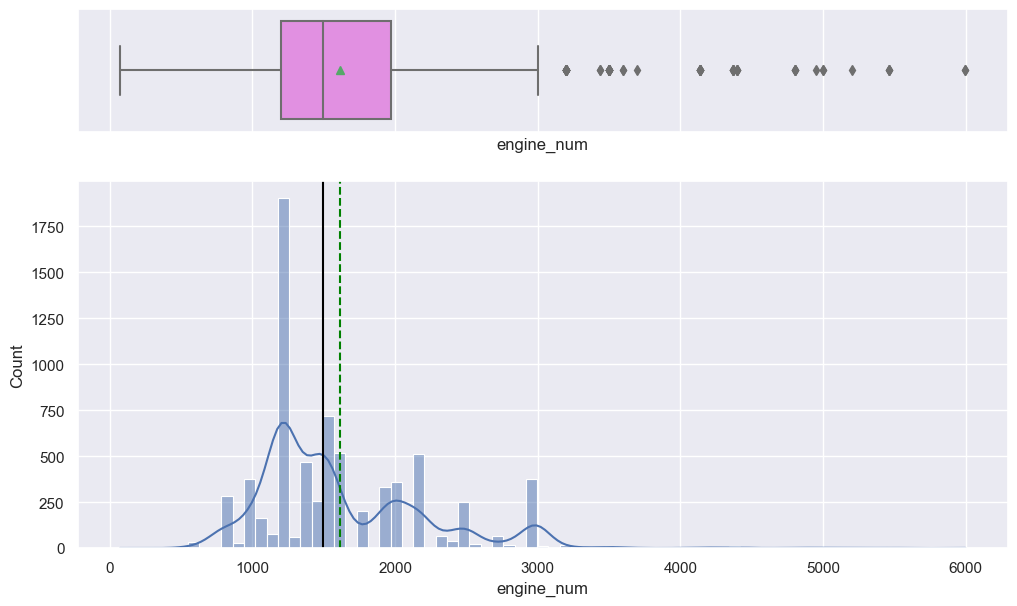

In [54]:
histogram_boxplot(df1, "engine_num", kde=True)

- The distribution is right skewed one . Most the cars have the displacement volume between 0 to 3000 CC. Above 3000 considered to be outliers here

#### `Power_num`

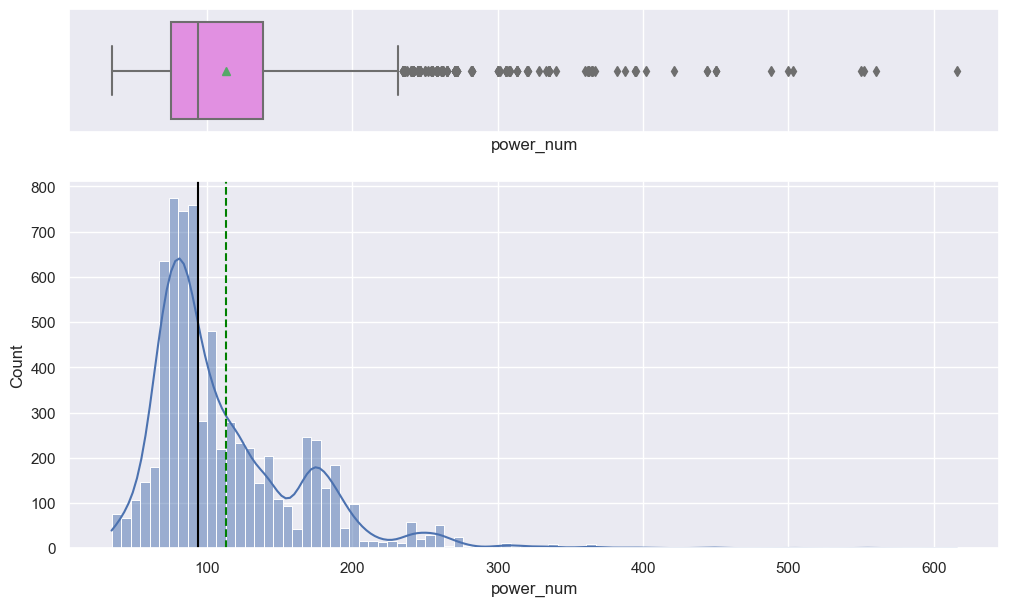

In [55]:
histogram_boxplot(df1, "power_num", kde=True)

- The distribution is highly right skewed and it has many  outliers

#### `Brand`

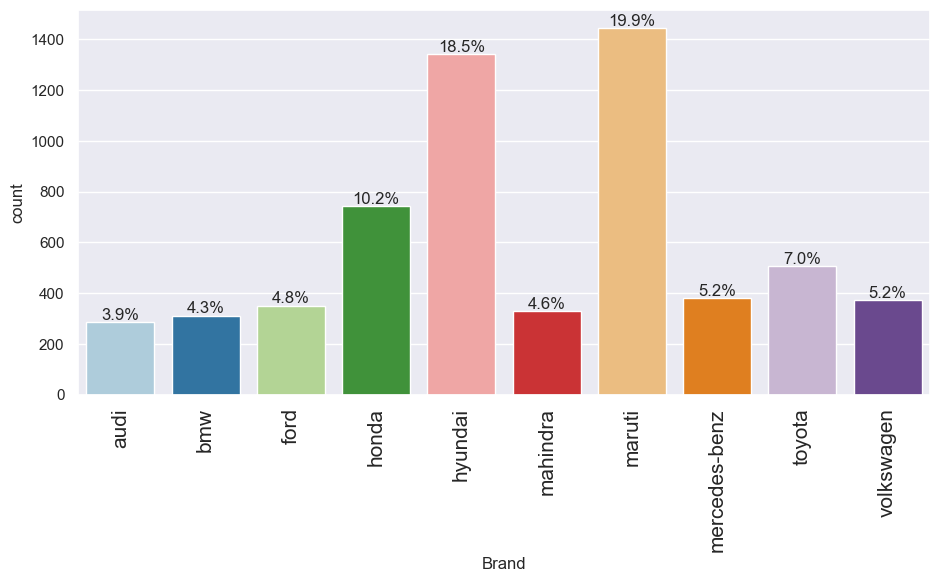

In [58]:
labeled_barplot(df1, "Brand", perc=True, n=10)

- : Maruti is the most purchased car (19.9%) and the next one is Hyundai which is 18.5%

#### `Model`

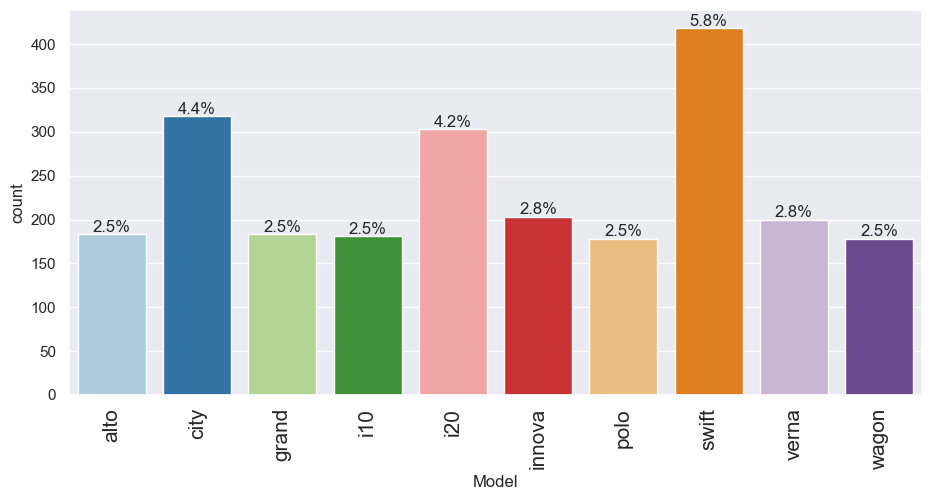

In [59]:
labeled_barplot(df1, "Model", perc=True, n=10)

-  Swift is the most purchased model which is 5.8%

#### `Seats`

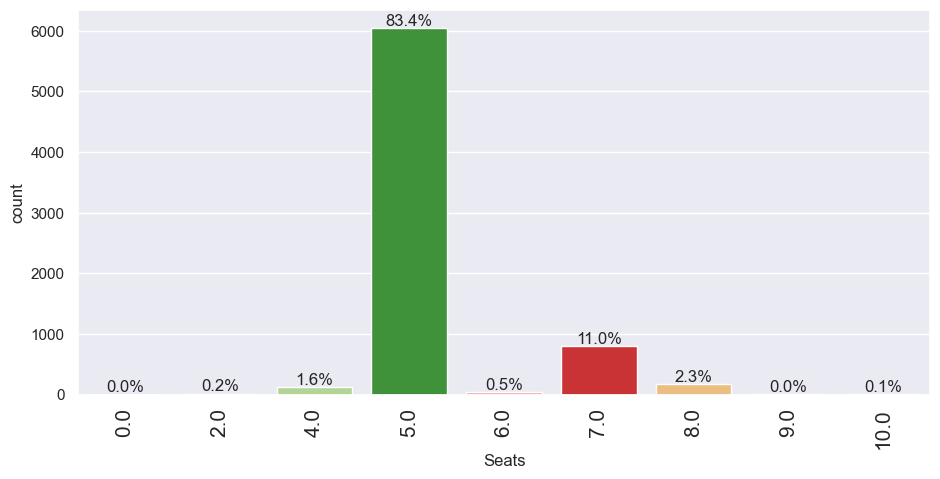

In [60]:
labeled_barplot(df1, "Seats", perc=True, n=10)

- Most of the cars (83.4%) have 5 seats

#### `Year`

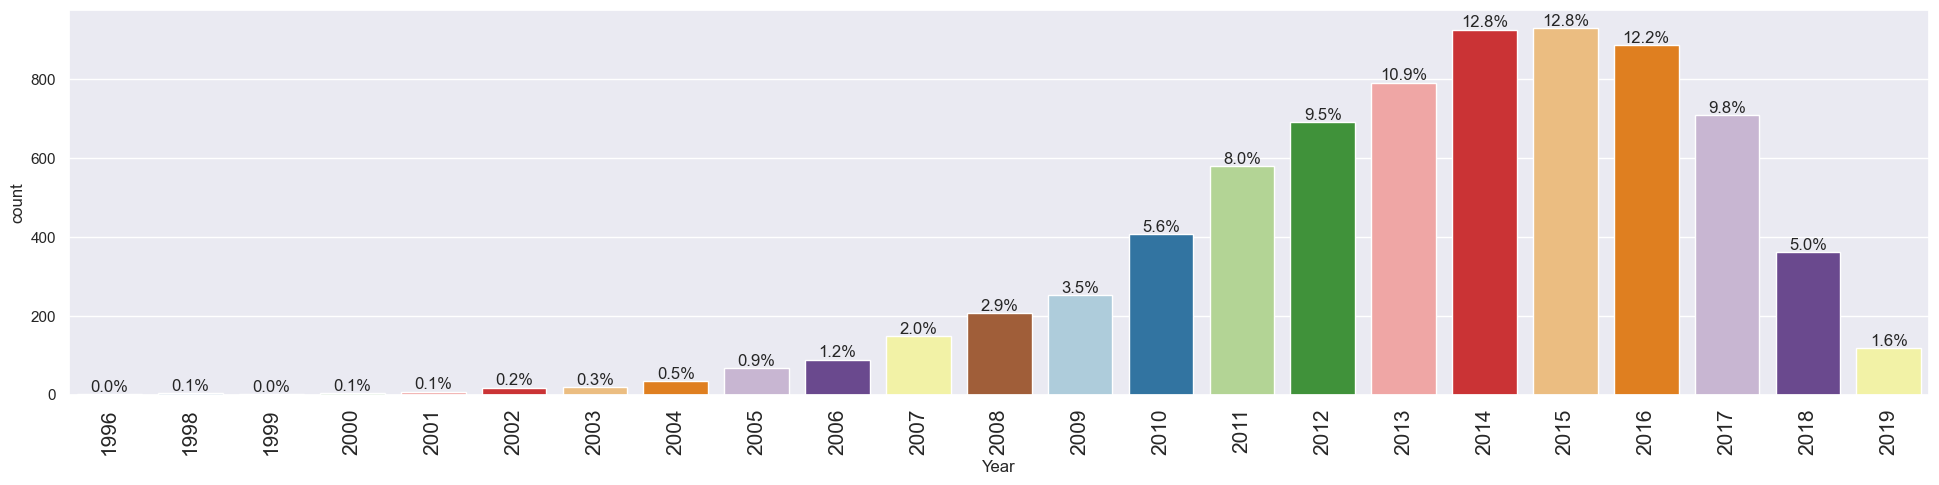

In [61]:
labeled_barplot(df1, "Year", perc=True)

-  12.8% of cars purchased in both the years 2014 and 2015

#### `Location`

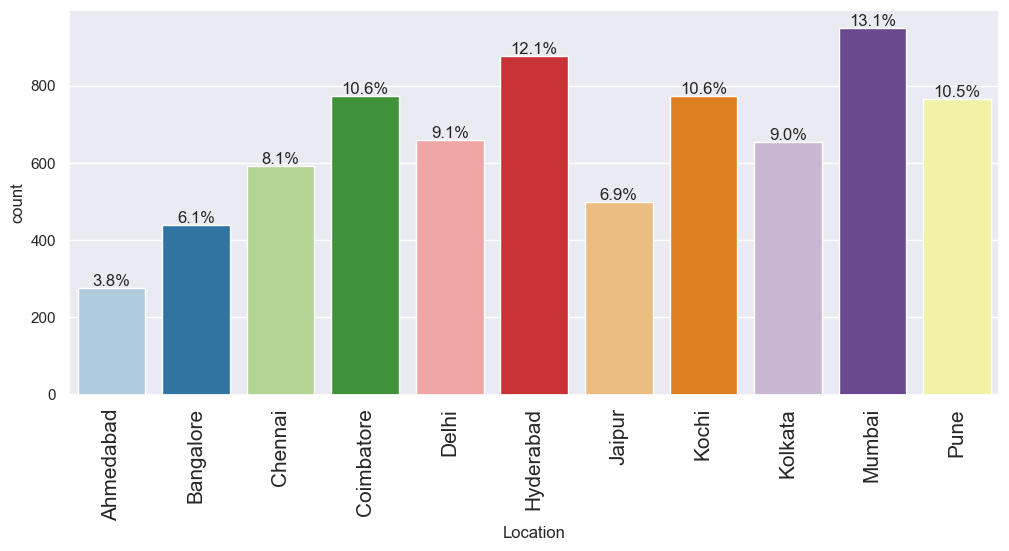

In [62]:
labeled_barplot(df1, "Location", perc=True)

-  Mumbai (13.1) takes the first place in purchasing the used cars

#### `Transmission`

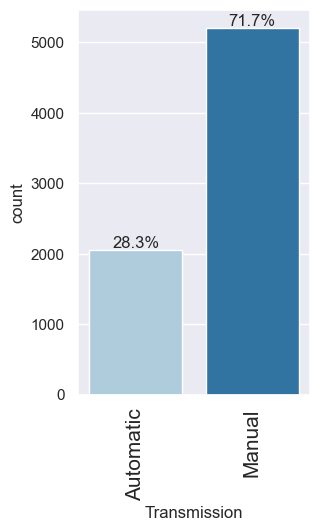

In [63]:
labeled_barplot(df1, "Transmission", perc=True)

-  Most of the cars are Manual type.

#### `Fuel_Type`

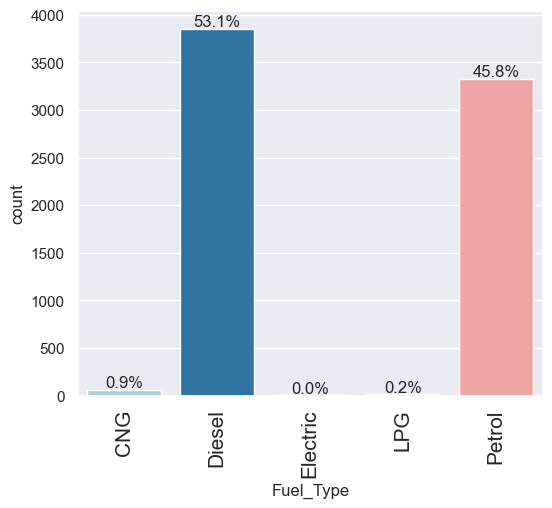

In [64]:
labeled_barplot(df1, "Fuel_Type", perc=True)

- 53.1% cars use Diesel whereas 45.8% of the cars use Petrol

#### `Owner_Type`

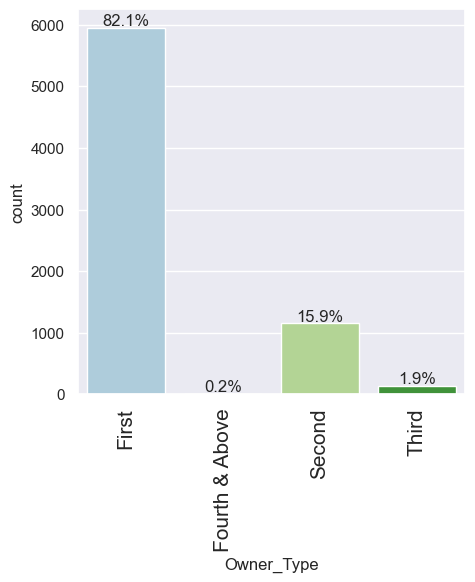

In [65]:
labeled_barplot(df1, "Owner_Type", perc=True)

- Most of the cars (82.1%) are sold for the first time

### Bivariate Distributions

**Correlation Check**

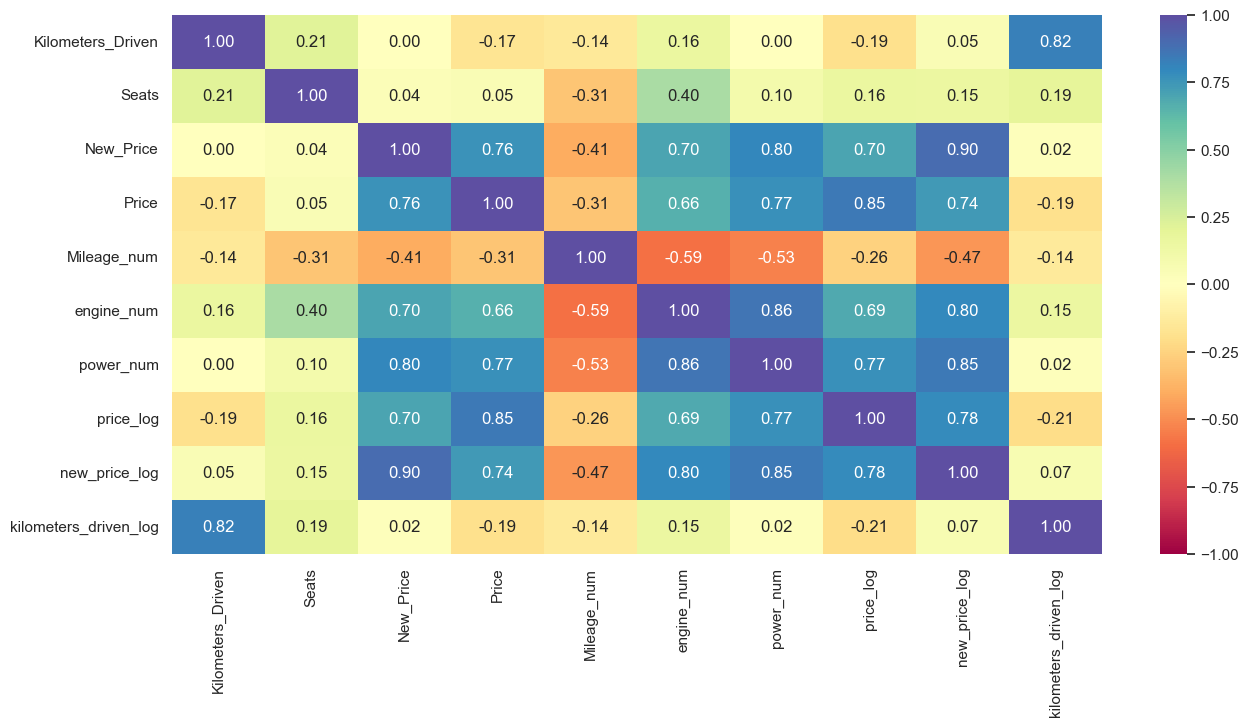

In [66]:
cols_list = df1.select_dtypes(include=np.number).columns.tolist()
# dropping Year as it is a temporal variable
cols_list.remove("Year")

plt.figure(figsize=(15, 7))
sns.heatmap(
    df1[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

•  Price has high correlation with New Price which denotes that the price of the used cars are determined based on the price of the new car
• Also Price has high correlation with Engine_num and power_num.
• Hence higher the engine and power, higher the price will be.
• Price has negative correlation with mileage and Kilomers_Driven
• Mileage_num is negatively correlated with power_num and engine_num whereas engine_num and power_num are highly 
positively correlated 
• New_Price is positively correlated with new_price_log,power_num,engine_num and Price


**Let's check the variation in Price with some of the other variables.**

**The location is imortant factor for used car price. Let's see how the price of cars varies across locations.**

**`Price` vs `Location`**

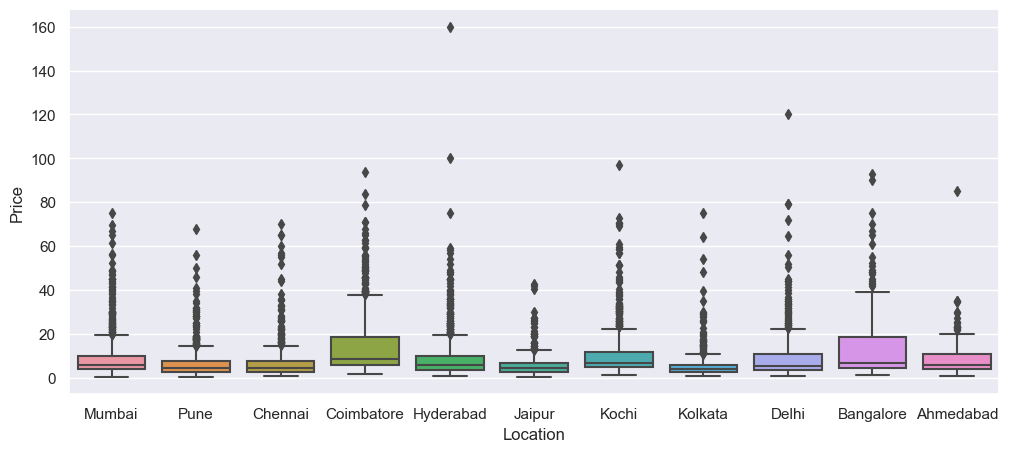

In [68]:
plt.figure(figsize=(12, 5))
sns.boxplot(x="Location", y="Price", data=df1)
plt.show()

- Most expensive car sold in Hyderabad for 160 lakhs. Next in Delhi for 120 Lakhs

**`Price` vs `Year`**

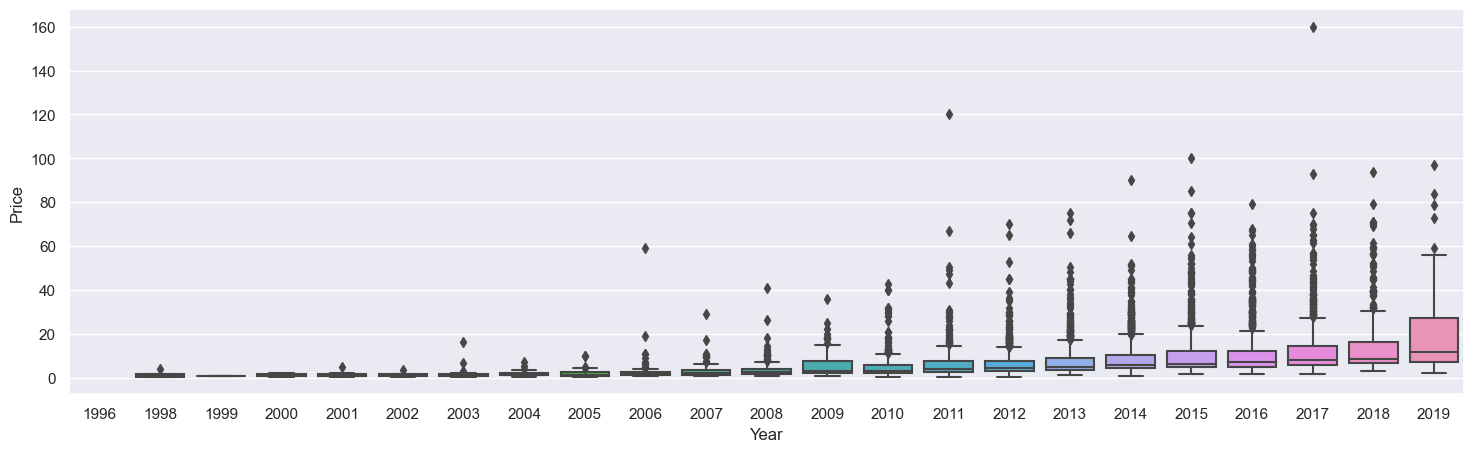

In [69]:
plt.figure(figsize=(18, 5))
sns.boxplot(x="Year", y="Price", data=df1)
plt.show()

**Let's see the how the price of cars varies across brands.**

**`Price` vs `Brand`**

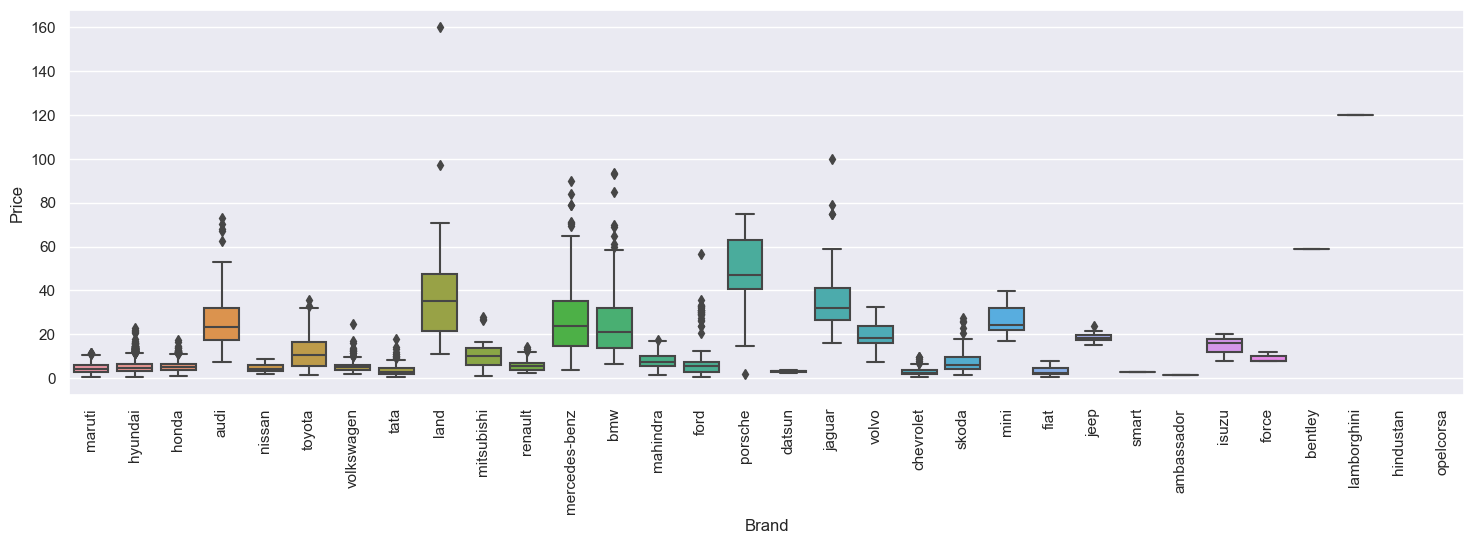

In [70]:
plt.figure(figsize=(18, 5))
sns.boxplot(x="Brand", y="Price", data=df1)
plt.xticks(rotation=90)
plt.show()

**`Price` vs `Transmission`**

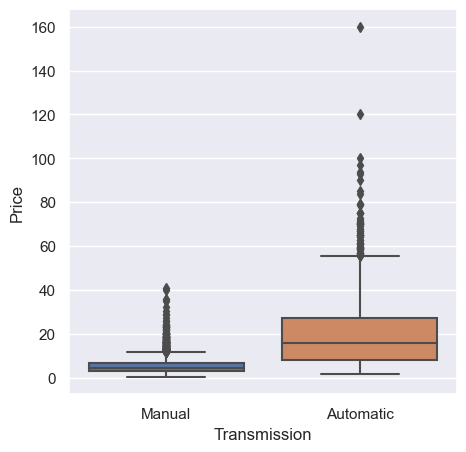

In [71]:
plt.figure(figsize=(5, 5))
sns.boxplot(x="Transmission", y="Price", data=df1)
plt.show()

- Automatic cars are pricing between 2 Lakhs to max of 58 Lakhs. It has outliers in price up to 160 Lakhs
- Manual car is between 0 to 15Lakhs and it has outliers up to 40 Lakhs

**`Price` vs `Fuel_Type`**

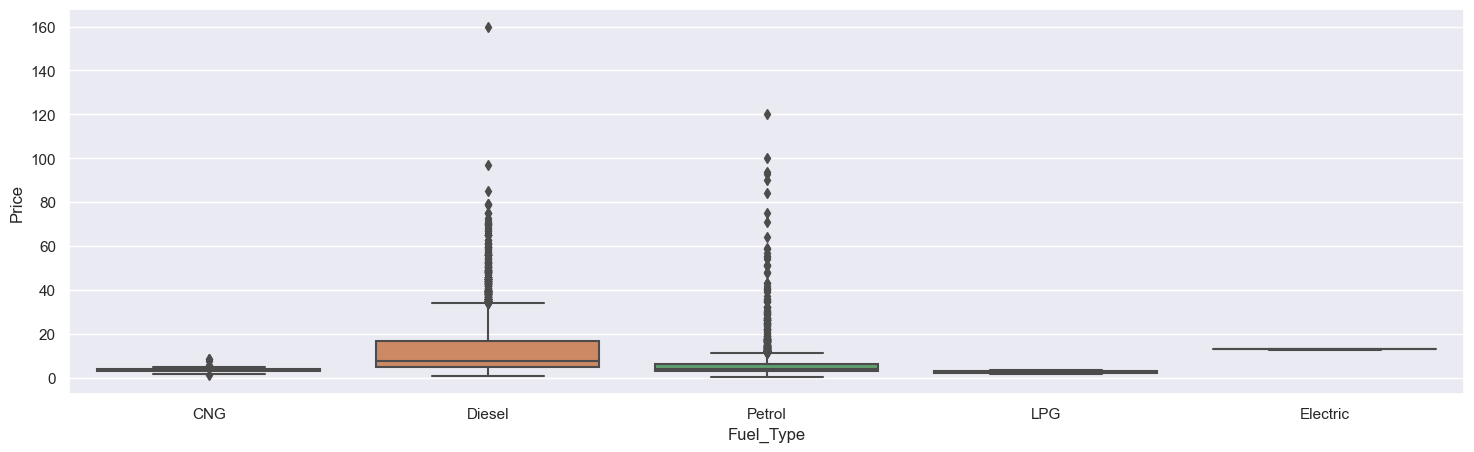

In [72]:
plt.figure(figsize=(18, 5))
sns.boxplot(x="Fuel_Type", y="Price", data=df1)
plt.show()

- Price of the Diesel car is lying between 0 to 38 Lakhs. It has many outliers too. The most expensive car of 160 Lakhs is of diesel car.
- Price of the petrol car is below 18 Lakhs.
- LPG and CNG are less in price which is below 5 Lakhs
- Electric car price is below 20 Lakhs

**`Price` vs `Owner_Type`**

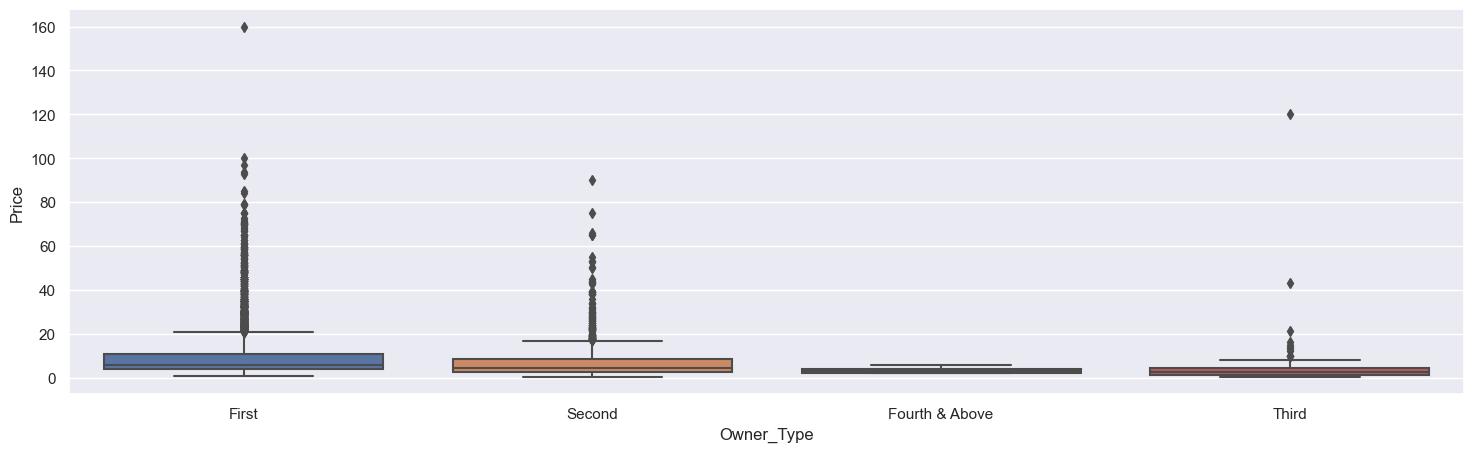

In [73]:
plt.figure(figsize=(18, 5))
sns.boxplot(x="Owner_Type", y="Price", data=df1)
plt.show()

- First and Second used cars almost same price range whereas the third and fourth hand cars are less in price 


**`Price` vs `Year`**

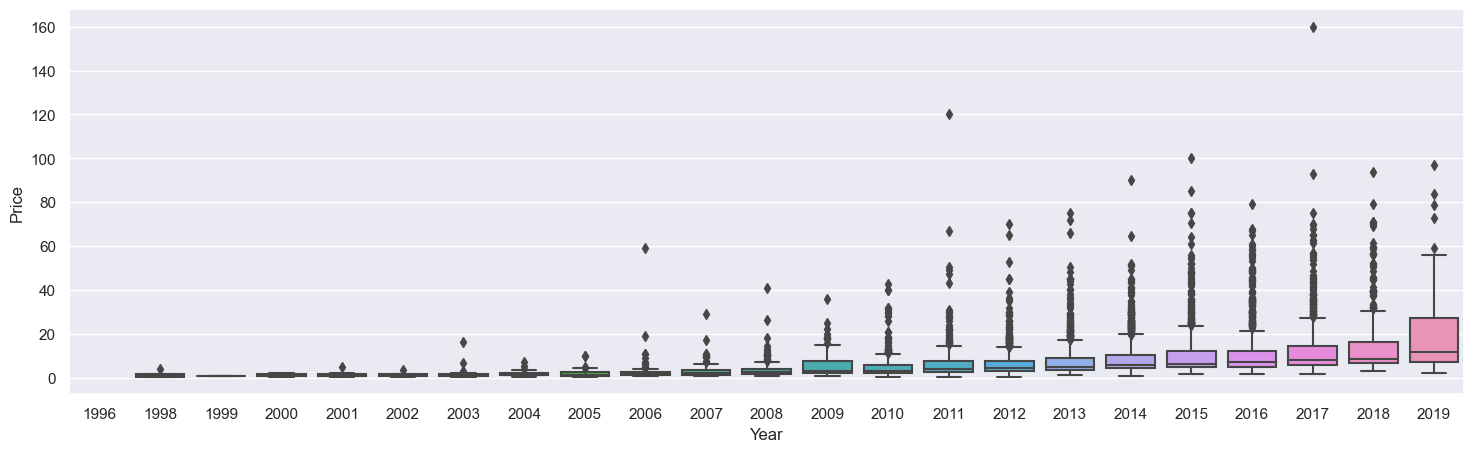

In [74]:
plt.figure(figsize=(18, 5))
sns.boxplot(x="Year", y="Price", data=df1)
plt.show()

**`Price` vs `Brand`**

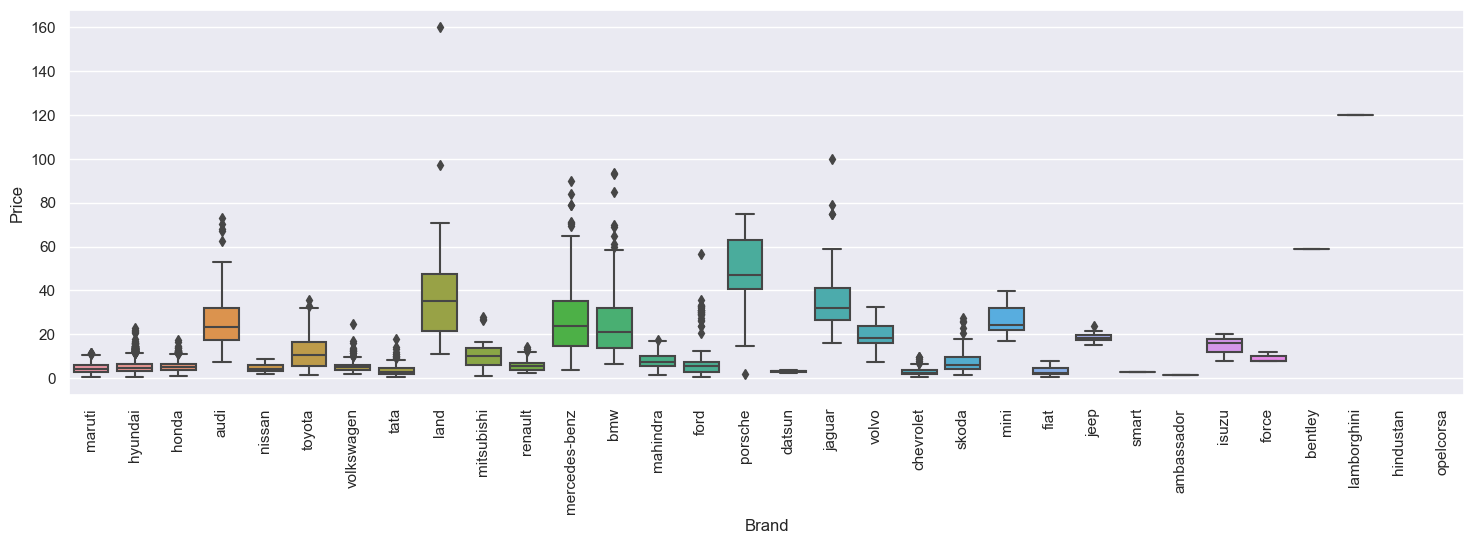

In [75]:
plt.figure(figsize=(18, 5))
sns.boxplot(x="Brand", y="Price", data=df1)
plt.xticks(rotation=90)
plt.show()

**`Price` vs `Transmission`**

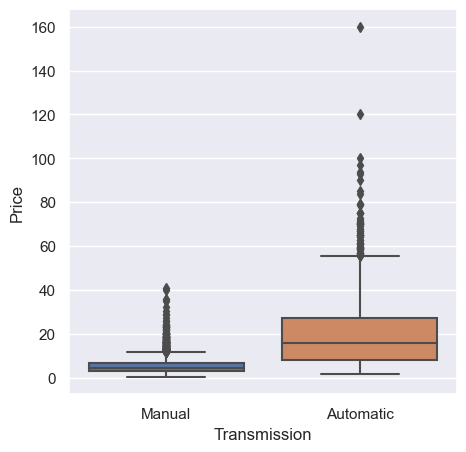

In [76]:
plt.figure(figsize=(5, 5))
sns.boxplot(x="Transmission", y="Price", data=df1)
plt.show()

**`Price` vs `Fuel_Type`**

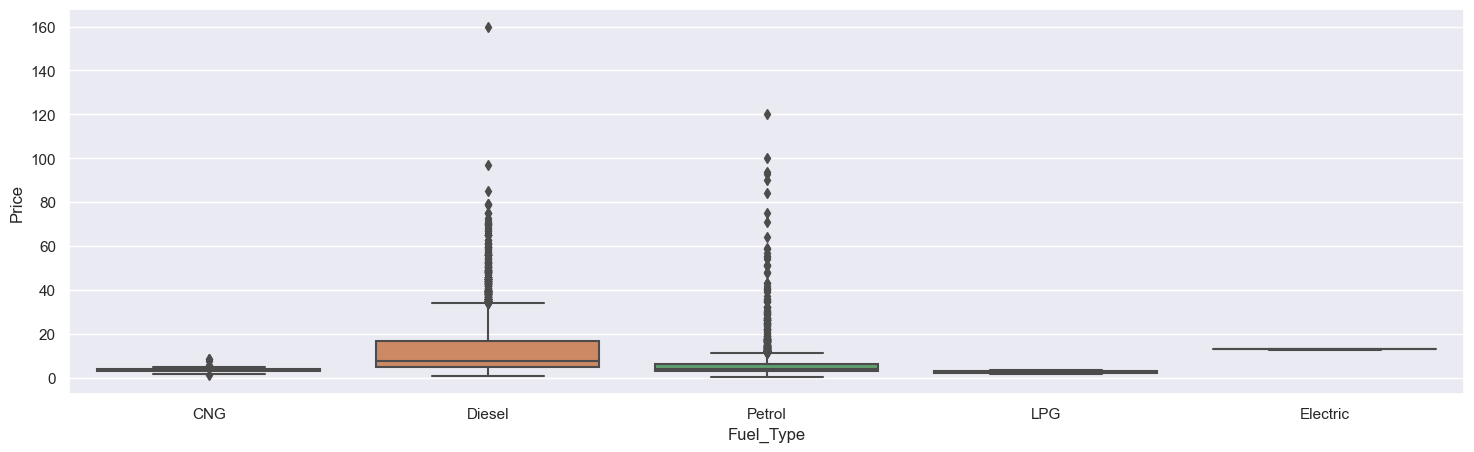

In [77]:
plt.figure(figsize=(18, 5))
sns.boxplot(x="Fuel_Type", y="Price", data=df1)
plt.show()

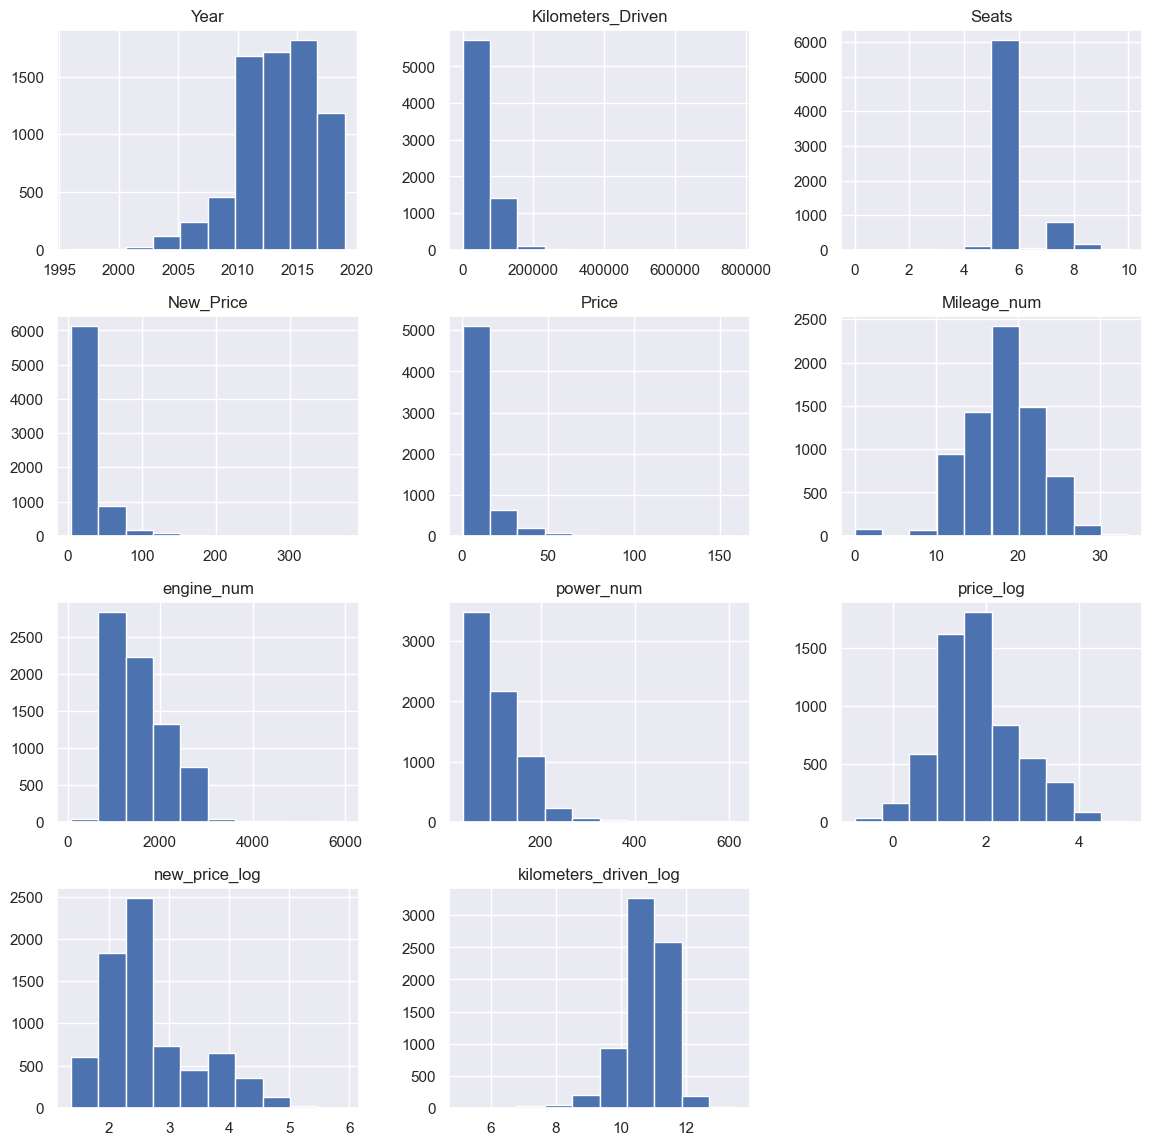

In [78]:
# creating histograms
df.hist(figsize=(14, 14))
plt.show()

## Data Preprocessing (contd.)

### Missing Value Treatment

In [79]:
df3.isnull().sum()

Location                    0
Year                        0
Kilometers_Driven           1
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Seats                      53
New_Price                   0
Price                    1234
Mileage_num                 2
engine_num                 46
power_num                 175
Brand                       0
Model                       0
price_log                1234
new_price_log               0
kilometers_driven_log       1
dtype: int64

In [80]:
df3[df3["Seats"].isnull()]  

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,Mileage_num,engine_num,power_num,Brand,Model,price_log,new_price_log,kilometers_driven_log
194,Ahmedabad,2007,60006.0,Petrol,Manual,First,NaN,13.580,2.95,0.00,NaN,NaN,honda,city,1.081805,2.608598,11.002200
208,Kolkata,2010,42001.0,Petrol,Manual,First,NaN,7.880,2.11,16.10,NaN,NaN,maruti,swift,0.746688,2.064328,10.645449
229,Bangalore,2015,70436.0,Diesel,Manual,First,NaN,7.650,3.60,0.00,1498.0,99.0,ford,figo,1.280934,2.034706,11.162460
733,Chennai,2006,97800.0,Petrol,Manual,Third,NaN,7.880,1.75,16.10,NaN,NaN,maruti,swift,0.559616,2.064328,11.490680
749,Mumbai,2008,55001.0,Diesel,Automatic,Second,NaN,120.000,26.50,0.00,NaN,NaN,land,rover,3.277145,4.787492,10.915107
1294,Delhi,2009,55005.0,Petrol,Manual,First,NaN,13.580,3.20,12.80,NaN,NaN,honda,city,1.163151,2.608598,10.915179
1327,Hyderabad,2015,50295.0,Petrol,Manual,First,NaN,7.880,5.80,16.10,NaN,NaN,maruti,swift,1.757858,2.064328,10.825661
1385,Pune,2004,115000.0,Petrol,Manual,Second,NaN,13.580,1.50,0.00,NaN,NaN,honda,city,0.405465,2.608598,11.652687
1460,Coimbatore,2008,69078.0,Petrol,Manual,First,NaN,120.000,40.88,0.00,NaN,NaN,land,rover,3.710641,4.787492,11.142992
1917,Jaipur,2005,88000.0,Petrol,Manual,Second,NaN,13.580,1.70,13.00,1493.0,100.0,honda,city,0.530628,2.608598,11.385092


**We'll impute these missing values one-by-one by taking the median number of seats for the particular car using the `Brand` and `Model`.**

In [81]:
df3.groupby(["Brand", "Model"], as_index=False)["Seats"].median() 

,Brand,Model,Seats
0,ambassador,classic,5.0
1,audi,a3,5.0
2,audi,a4,5.0
3,audi,a6,5.0
4,audi,a7,5.0
...,...,...,...
217,volvo,s60,5.0
218,volvo,s80,5.0
219,volvo,v40,5.0
220,volvo,xc60,5.0


In [82]:
# imputing missing values in Seats
df3["Seats"] = df3.groupby(["Brand", "Model"])["Seats"].transform(
    lambda x: x.fillna(x.median())
) 

In [83]:
df3[df3["Seats"].isnull()] 

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,Mileage_num,engine_num,power_num,Brand,Model,price_log,new_price_log,kilometers_driven_log
2369,Chennai,2008,56000.0,Petrol,Manual,Second,NaN,7.88,1.50,19.5,1061.0,NaN,maruti,estilo,0.405465,2.064328,10.933107
3882,Kolkata,2010,40000.0,Petrol,Manual,Second,NaN,7.88,2.50,19.5,1061.0,NaN,maruti,estilo,0.916291,2.064328,10.596635
5893,Chennai,2008,51000.0,Petrol,Manual,Second,NaN,7.88,1.75,19.5,1061.0,NaN,maruti,estilo,0.559616,2.064328,10.839581


In [84]:
df3[df3["Brand"]=='maruti'].median()

Year                      2014.000000
Kilometers_Driven        52000.000000
Seats                        5.000000
New_Price                    7.880000
Price                        4.150000
Mileage_num                 21.100000
engine_num                1197.000000
power_num                   74.000000
price_log                    1.423108
new_price_log                2.064328
kilometers_driven_log       10.858999
dtype: float64

In [85]:
df3.Seats.fillna(5,inplace=True)  
#df3["Seats"] = df3.groupby(["Brand"])["Seats"].transform(lambda x: x.fillna(x.mean())

In [86]:
df3[df3["Seats"].isnull()]

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,Mileage_num,engine_num,power_num,Brand,Model,price_log,new_price_log,kilometers_driven_log


**We will use a similar method to fill missing values for the `Kilometers_Driven`, `mileage_num`, `engine_num`, and `power_num` columns.**

In [87]:
cols_list = ["Kilometers_Driven","Mileage_num", "engine_num", "power_num"]

for col in cols_list:
    df3[col] = df3.groupby(["Brand", "Model"])[col].transform(
        lambda x: x.fillna(x.median())
    )

df3.isnull().sum()

Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Seats                       0
New_Price                   0
Price                    1234
Mileage_num                 2
engine_num                  0
power_num                  12
Brand                       0
Model                       0
price_log                1234
new_price_log               0
kilometers_driven_log       1
dtype: int64

In [88]:
cols_list = ["Mileage_num","power_num"]

for col in cols_list:
    df3[col] = df3.groupby(["Brand"])[col].transform(
        lambda x: x.fillna(x.median()))

df3.isnull().sum()

Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Seats                       0
New_Price                   0
Price                    1234
Mileage_num                 0
engine_num                  0
power_num                   2
Brand                       0
Model                       0
price_log                1234
new_price_log               0
kilometers_driven_log       1
dtype: int64

In [89]:
cols_list = ["Price","power_num"]

for col in cols_list:
    df3[col] = df3[col].fillna(df[col].median())

df3.isnull().sum()

Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Seats                       0
New_Price                   0
Price                       0
Mileage_num                 0
engine_num                  0
power_num                   0
Brand                       0
Model                       0
price_log                1234
new_price_log               0
kilometers_driven_log       1
dtype: int64

In [90]:
df3.dropna(subset=["Price","price_log"], inplace=True) 
 
# reapplying the log transform to the Kilometers_Driven column.
df3["kilometers_driven_log"] = np.log(df3["Kilometers_Driven"])

# checking for missing values
df3.isnull().sum()

Location                 0
Year                     0
Kilometers_Driven        0
Fuel_Type                0
Transmission             0
Owner_Type               0
Seats                    0
New_Price                0
Price                    0
Mileage_num              0
engine_num               0
power_num                0
Brand                    0
Model                    0
price_log                0
new_price_log            0
kilometers_driven_log    0
dtype: int64

In [91]:
df3.isnull().sum()

Location                 0
Year                     0
Kilometers_Driven        0
Fuel_Type                0
Transmission             0
Owner_Type               0
Seats                    0
New_Price                0
Price                    0
Mileage_num              0
engine_num               0
power_num                0
Brand                    0
Model                    0
price_log                0
new_price_log            0
kilometers_driven_log    0
dtype: int64

In [92]:
# dropping the redundant columns
df3.drop(columns=["Kilometers_Driven"], inplace=True)

## Model Building - Linear Regression


### Model Performance Check

**Let's check the performance of the model using different metrics.**

* We will be using metric functions defined in sklearn for RMSE, MAE, and $R^2$.
* We will define a function to calculate MAPE and adjusted $R^2$.    
* We will create a function which will print out all the above metrics in one go.

In [93]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

1. We want to predict the used car price. As `Price` is a skewed variable, we will try building a model using both the actual variable and its normalized version `price_log`.
2. Before we proceed to build a model, we'll have to encode categorical features.
3. We'll split the data into train and test to be able to evaluate the model that we build on the train data.
4. We will build a Linear Regression model using the train data and then check it's performance.

### Data Preparation for modeling with Price as Dependent variable

In [94]:
# defining the dependent and independent variables
X = df3.drop(["Price", "price_log"], axis=1)
y = df3["Price"] 


In [95]:
# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)  

X.head()

,Year,Seats,New_Price,Mileage_num,engine_num,power_num,new_price_log,kilometers_driven_log,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Brand_audi,Brand_bentley,Brand_bmw,Brand_chevrolet,Brand_datsun,Brand_fiat,Brand_force,Brand_ford,Brand_honda,Brand_hyundai,Brand_isuzu,Brand_jaguar,Brand_jeep,Brand_lamborghini,Brand_land,Brand_mahindra,Brand_maruti,Brand_mercedes-benz,Brand_mini,Brand_mitsubishi,Brand_nissan,Brand_porsche,Brand_renault,Brand_skoda,Brand_smart,Brand_tata,Brand_toyota,Brand_volkswagen,Brand_volvo,Model_1000,Model_3,Model_5,Model_6,Model_7,Model_800,Model_a,Model_a-star,Model_a3,Model_a4,Model_a6,Model_a7,Model_a8,Model_accent,Model_accord,Model_alto,Model_amaze,Model_ameo,Model_aspire,Model_aveo,Model_avventura,Model_b,Model_baleno,Model_beat,Model_beetle,Model_bolero,Model_bolt,Model_boxster,Model_br-v,Model_brio,Model_brv,Model_c-class,Model_camry,Model_captiva,Model_captur,Model_cayenne,Model_cayman,Model_cedia,Model_celerio,Model_ciaz,Model_city,Model_civic,Model_cla,Model_classic,Model_cls-class,Model_clubman,Model_compass,Model_continental,Model_cooper,Model_corolla,Model_countryman,Model_cr-v,Model_creta,Model_crosspolo,Model_cruze,Model_d-max,Model_duster,Model_dzire,Model_e,Model_e-class,Model_ecosport,Model_eeco,Model_elantra,Model_elite,Model_endeavour,Model_enjoy,Model_eon,Model_ertiga,Model_esteem,Model_estilo,Model_etios,Model_evalia,Model_f,Model_fabia,Model_fiesta,Model_figo,Model_fluence,Model_fortuner,Model_fortwo,Model_freestyle,Model_fusion,Model_gallardo,Model_getz,Model_gl-class,Model_gla,Model_glc,Model_gle,Model_gls,Model_go,Model_grand,Model_grande,Model_hexa,Model_i10,Model_i20,Model_ignis,Model_ikon,Model_indica,Model_indigo,Model_innova,Model_jazz,Model_jeep,Model_jetta,Model_koleos,Model_kuv,Model_kwid,Model_lancer,Model_laura,Model_linea,Model_lodgy,Model_logan,Model_m-class,Model_manza,Model_micra,Model_mobilio,Model_montero,Model_mustang,Model_mux,Model_nano,Model_new,Model_nexon,Model_nuvosport,Model_octavia,Model_omni,Model_one,Model_optra,Model_outlander,Model_pajero,Model_panamera,Model_passat,Model_petra,Model_platinum,Model_polo,Model_prius,Model_pulse,Model_punto,Model_q3,Model_q5,Model_q7,Model_qualis,Model_quanto,Model_r-class,Model_rapid,Model_redi,Model_redi-go,Model_renault,Model_ritz,Model_rover,Model_rs5,Model_s,Model_s-class,Model_s-cross,Model_s60,Model_s80,Model_safari,Model_sail,Model_santa,Model_santro,Model_scala,Model_scorpio,Model_siena,Model_sl-class,Model_slc,Model_slk-class,Model_sonata,Model_spark,Model_ssangyong,Model_sumo,Model_sunny,Model_superb,Model_swift,Model_sx4,Model_tavera,Model_teana,Model_terrano,Model_thar,Model_tiago,Model_tigor,Model_tiguan,Model_tt,Model_tucson,Model_tuv,Model_v40,Model_vento,Model_venture,Model_verito,Model_verna,Model_versa,Model_vitara,Model_wagon,Model_wr-v,Model_wrv,Model_x-trail,Model_x1,Model_x3,Model_x5,Model_x6,Model_xc60,Model_xc90,Model_xcent,Model_xe,Model_xenon,Model_xf,Model_xj,Model_xuv300,Model_xuv500,Model_xylo,Model_yeti,Model_z4,Model_zen,Model_zest
0,2010,5.0,5.51,26.60,998.0,58.16,1.706565,11.184421,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2015,5.0,16.06,19.67,1582.0,126.20,2.776332,10.621327,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0

In [96]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


In [97]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 4213
Number of rows in test data = 1806


### Model Building - Linear Regression with Price as Dependent variable

In [98]:
lin_reg_model1 = LinearRegression()
lin_reg_model1.fit(x_train, y_train) 

LinearRegression()

In [99]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
lin_reg_model1_perf_train = model_performance_regression(lin_reg_model1, x_train, y_train)
lin_reg_model1_perf_train

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,4.004981,2.213493,0.874558,0.866136,43.304437


In [100]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
lin_reg_model1_perf_test = model_performance_regression(lin_reg_model1, x_test, y_test)
lin_reg_model1_perf_test

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,4.667837,2.44294,0.816523,0.78495,43.483235


### Data Preparation for modeling with price_log as Dependent variable

In [108]:
# defining the dependent and independent variables
X = df3.drop(["Price", "price_log"], axis=1)
y = df3["price_log"]

In [109]:
# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
) 

In [110]:
# splitting the data in 70:30 ratio for train to test data


x_train2, x_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.3, random_state=1)


In [111]:
print("Number of rows in train data =", x_train2.shape[0])
print("Number of rows in test data =", x_test2.shape[0])

Number of rows in train data = 4213
Number of rows in test data = 1806


### Model Building - Linear Regression with price_log as Dependent variable

In [112]:
lin_reg_model2 = LinearRegression()
lin_reg_model2.fit(x_train2, y_train2) 

LinearRegression()

In [113]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")

lin_reg_model2_perf_train = model_performance_regression(lin_reg_model2, x_train2, y_train2)
print(lin_reg_model2_perf_train)



Training Performance

       RMSE       MAE  R-squared  Adj. R-squared  MAPE
0  0.175893  0.123522   0.959337        0.956606   inf


In [114]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")

lin_reg_model2_perf_test = model_performance_regression(lin_reg_model2, x_test2, y_test2)

lin_reg_model2_perf_test



Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.177217,0.127642,0.959215,0.952197,inf


## Model Performance Comparison

In [115]:
# training performance comparison

models_train_comp_df = pd.concat(
    [lin_reg_model1_perf_train.T, lin_reg_model2_perf_train.T,], axis=1,
)

models_train_comp_df.columns = [
    "Linear Regression (Price)",
    "Linear Regression (price_log)",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Linear Regression (Price),Linear Regression (price_log)
RMSE,4.004981,0.175893
MAE,2.213493,0.123522
R-squared,0.874558,0.959337
Adj. R-squared,0.866136,0.956606
MAPE,43.304437,inf


In [116]:
# test performance comparison

models_test_comp_df = pd.concat(
    [lin_reg_model1_perf_test.T, lin_reg_model2_perf_test.T,], axis=1,
)

models_test_comp_df.columns = [
    "Linear Regression (Price)",
    "Linear Regression (price_log)",
]

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Linear Regression (Price),Linear Regression (price_log)
RMSE,4.667837,0.177217
MAE,2.442940,0.127642
R-squared,0.816523,0.959215
Adj. R-squared,0.784950,0.952197
MAPE,43.483235,inf


## Actionable Insights and Recommendations 

• We have been able to build a predictive model that can be used by scientist to predict the pricing of a car with an R2 score of 0.87 on the training set.

• The train and test R2 are 0.87 and 0.81, indicating that the model explains 87.4 % and 81.4% of the total variation in the train and test sets respectively. Also, both scores are comparable

• Our R2 value is close to 1, which means significance amount of variance is explained in our model

• Training data R2 is greater than the test data R2 . This shows that the model is slightly overfitting

• MAPE of 43.4 on the test data means that we are able to predict within 43.4% of the pricing

• RMSE values on the train and test sets are also comparable

• We can also explore improving the linear model by applying non-linear transformations to some of the attributes. This might help us better identify the patterns in the data to predict more accurately

___